In [1]:
import re
import glob
import math
import random
import pandas as pd
import numpy as np
np.bool = np.bool_
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pylab as py
from sklearn import datasets
from scipy import stats
from scipy.stats import pearsonr
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import QuantileTransformer
from sklearn.datasets import make_blobs

%matplotlib inline

In [2]:
trainDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\5ppm\\df_train_dbMSIn5ppm4nonInDI_STDnorm.csv")
extDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\5ppm\\df_ext_dbMSIn5ppm4nonInDI_STDnorm.csv")
ingestedDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\5ppm\\df_ingested_dbMSIn5ppm4nonInDI_STDnorm.csv")
fnaDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\5ppm\\df_FNA_dbMSIn5ppm4nonInDI_STDnorm.csv")
diDEFSDf = pd.read_csv("I:\\3_output_raMSIn\\3_3_Output_raMSIn_HKU_Ingested4ALL\\5ppm\\df_nonInDI_dbMSIn5ppm4nonInDI_STDnorm.csv")

In [3]:
trainDEFSDf.describe()

,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842,type
count,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,9.096000e+04,90960.000000
mean,3.457371e-14,-2.809005e-13,1.634376e-15,-2.289559e-13,3.305914e-13,3.782690e-14,6.541486e-14,-8.850338e-15,-2.433348e-14,-1.525218e-13,9.235635e-15,6.818057e-14,-3.563790e-14,-1.097078e-15,1.211506e-14,7.357547e-17,1.329402e-13,0.478353
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.499534
min,-1.115600e+00,-1.035619e+00,-4.018949e+00,-1.168013e+00,-4.026078e-01,-1.829801e+00,-1.162140e+00,-2.513467e+00,-7.003385e-01,-1.234076e+00,-2.680557e+00,-4.081202e-01,-7.349735e-01,-3.398296e+00,-2.414933e+00,-2.827895e+00,-1.195204e+00,0.000000
25%,-1.115600e+00,-1.035619e+00,-6.738176e-01,-1.168013e+00,-4.026078e-01,-1.862807e-01,-1.162140e+00,-5.620147e-01,-7.003385e-01,-1.234076e+00,-3.023417e-01,-4.081202e-01,-7.349735e-01,-8.430164e-01,-5.994146e-01,-7.816294e-01,-1.195204e+00,0.000000
50%,1.427778e-01,4.191691e-01,-1.232176e-01,4.386467e-01,-4.026078e-01,3.050475e-01,2.363663e-01,-3.780473e-03,-7.003385e-01,1.491292e-01,1.928793e-01,-4.081202e-01,3.488842e-02,6.624436e-02,-8.317274e-02,-4.252973e-02,1.434300e-01,0.000000
75%,4.713022e-01,9.336811e-01,5.632490e-01,8.547891e-01,-4.026078e-01,6.673778e-01,7.203251e-01,6.053215e-01,5.501632e-01,5.518252e-01,5.867894e-01,-4.081202e-01,4.014834e-01,7.931650e-01,4.860157e-01,5.450633e-01,5.066676e-01,1.000000
max,1.045436e+01,2.763321e+00,5.839704e+00,3.527345e+00,5.600009e+00,2.659900e+00,3.264022e+00,3.892800e+00,1.101685e+01,9.311320e+00,4.163719e+00,1.197080e+01,1.325024e+01,3.439752e+00,5.029479e+00,5.331447e+00,9.826959e+00,1.000000


In [4]:
trainDEFSDf

,pixel_id,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842,type
0,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.688075,0.571627,-1.174372,1.063717,-0.402608,0.530386,-1.162140,-0.460314,4.504229,2.433620,0.763553,4.206358,4.516292,-0.820173,-0.938106,-0.366259,3.236921,0
1,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,5.100656,1.500452,-0.377475,1.371974,-0.402608,0.261448,-1.162140,0.114807,5.622844,3.295467,1.669318,4.660548,5.492306,-0.600716,-1.052497,-0.356656,4.400250,0
2,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.446205,0.632002,-0.825142,0.988573,-0.402608,-0.132213,-0.001739,-0.444349,3.715588,2.422229,1.925770,3.145579,4.409094,-0.574920,-1.218949,-0.595259,2.951787,0
3,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,3.197035,0.437932,-0.418539,1.280690,-0.402608,-0.081180,-1.162140,-0.346415,3.504202,2.330939,1.504090,3.809358,4.249205,-0.749250,-0.676211,-0.705813,2.725904,0
4,HKULiver_Post29wk_HCCAMCLiver_Left_Mice03_Slid...,1.997351,0.761102,-1.300546,0.782923,-0.402608,0.628778,-1.162140,-0.335517,2.568640,1.465051,0.493887,2.525056,2.983379,-0.602580,-0.720711,-0.551822,1.668743,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.410654,-1.035619,0.040891,-1.168013,-0.402608,1.089779,0.894498,-0.912395,0.737794,0.451720,0.701177,-0.408120,0.504213,-1.012988,-0.681860,-0.745363,0.388220,1
90956,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.252531,-1.035619,-0.899617,0.716853,-0.402608,1.349007,-1.162140,-0.397604,0.870632,0.530896,0.443536,-0.408120,0.260001,-1.287821,-0.193146,-0.758145,0.407976,1
90957,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.357592,1.264396,-0.920862,-1.168013,-0.402608,0.878974,0.567022,-0.582258,0.522238,0.493701,1.245964,-0.408120,-0.734974,-1.024784,0.706513,-0.403020,0.412271,1
90958,HKULiver_Post29wk_HCCLiver_Left_Mice12_Slide4F...,0.526713,-1.035619,-1.209545,-1.168013,-0.402608,0.671900,0.623847,-1.045097,0.702885,0.357600,0.669866,-0.408120,0.671895,-0.941051,0.038292,-0.377786,0.401027,1


In [5]:
def sns_heatmap(df):
    sns.heatmap(df, cmap="inferno", vmin=0, vmax=1.0)

In [6]:
trainDEFSDf = trainDEFSDf[trainDEFSDf.columns[1:-1]]
extDEFSDf = extDEFSDf[extDEFSDf.columns[1:-1]]
fnaDEFSDf = fnaDEFSDf[fnaDEFSDf.columns[1:-1]]
ingestedDEFSDf = ingestedDEFSDf[ingestedDEFSDf.columns[1:-1]]
diDEFSDf = diDEFSDf[diDEFSDf.columns[1:-1]]

In [7]:
trainDEFSDf

,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842
0,3.688075,0.571627,-1.174372,1.063717,-0.402608,0.530386,-1.162140,-0.460314,4.504229,2.433620,0.763553,4.206358,4.516292,-0.820173,-0.938106,-0.366259,3.236921
1,5.100656,1.500452,-0.377475,1.371974,-0.402608,0.261448,-1.162140,0.114807,5.622844,3.295467,1.669318,4.660548,5.492306,-0.600716,-1.052497,-0.356656,4.400250
2,3.446205,0.632002,-0.825142,0.988573,-0.402608,-0.132213,-0.001739,-0.444349,3.715588,2.422229,1.925770,3.145579,4.409094,-0.574920,-1.218949,-0.595259,2.951787
3,3.197035,0.437932,-0.418539,1.280690,-0.402608,-0.081180,-1.162140,-0.346415,3.504202,2.330939,1.504090,3.809358,4.249205,-0.749250,-0.676211,-0.705813,2.725904
4,1.997351,0.761102,-1.300546,0.782923,-0.402608,0.628778,-1.162140,-0.335517,2.568640,1.465051,0.493887,2.525056,2.983379,-0.602580,-0.720711,-0.551822,1.668743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90955,0.410654,-1.035619,0.040891,-1.168013,-0.402608,1.089779,0.894498,-0.912395,0.737794,0.451720,0.701177,-0.408120,0.504213,-1.012988,-0.681860,-0.745363,0.388220
90956,0.252531,-1.035619,-0.899617,0.716853,-0.402608,1.349007,-1.162140,-0.397604,0.870632,0.530896,0.443536,-0.408120,0.260001,-1.287821,-0.193146,-0.758145,0.407976
90957,0.357592,1.264396,-0.920862,-1.168013,-0.402608,0.878974,0.567022,-0.582258,0.522238,0.493701,1.245964,-0.408120,-0.734974,-1.024784,0.706513,-0.403020,0.412271
90958,0.526713,-1.035619,-1.209545,-1.168013,-0.402608,0.671900,0.623847,-1.045097,0.702885,0.357600,0.669866,-0.408120,0.671895,-0.941051,0.038292,-0.377786,0.401027


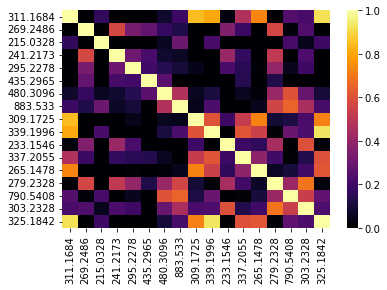

In [9]:
sns_heatmap(trainDEFSDf.corr())

In [10]:
def mz_corr(df, name):
    plt.rcParams['figure.figsize'] = [5.2, 5]
    plt.rcParams["figure.dpi"] = 600

    df_corr=df.corr()
    cor_matrix =df_corr.abs()
    upper_corr = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(np.bool))
    return upper_corr

In [11]:
pd.set_option('display.max_columns', None)

In [12]:
mz_corr(trainDEFSDf, "trainDEFSDf")

,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842
311.1684,NaN,0.22176,0.162850,0.256924,0.070765,0.140854,0.080729,0.183704,0.844836,0.808122,0.023512,0.469127,0.733169,0.006062,0.245490,0.215611,0.919325
269.2486,NaN,NaN,0.281837,0.569254,0.333342,0.279635,0.173657,0.123122,0.006086,0.230859,0.354795,0.185378,0.065084,0.566308,0.021270,0.232210,0.217032
215.0328,NaN,NaN,NaN,0.296343,0.137742,0.107318,0.061727,0.301388,0.031564,0.222526,0.223256,0.165181,0.009769,0.123159,0.215961,0.048340,0.191394
241.2173,NaN,NaN,NaN,NaN,0.306406,0.214767,0.084810,0.065468,0.025557,0.270968,0.412366,0.167913,0.083605,0.510320,0.025127,0.226485,0.256544
295.2278,NaN,NaN,NaN,NaN,NaN,0.199617,0.138983,0.098586,0.043021,0.072154,0.219344,0.144721,0.012364,0.399673,0.053164,0.188414,0.063653
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,0.258301,0.091939,0.009513,0.134661,0.117689,0.134399,0.061993,0.127529,0.115757,0.195068,0.129712
480.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.476086,0.056009,0.111198,0.181460,0.056845,0.018975,0.410695,0.605003,0.289807,0.101495
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.047249,0.229634,0.046127,0.005727,0.050121,0.558896,0.651625,0.458098,0.213084
309.1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.603964,0.191340,0.525053,0.724561,0.096463,0.117940,0.219288,0.722614
339.1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012598,0.612993,0.545717,0.014739,0.293624,0.228958,0.933364


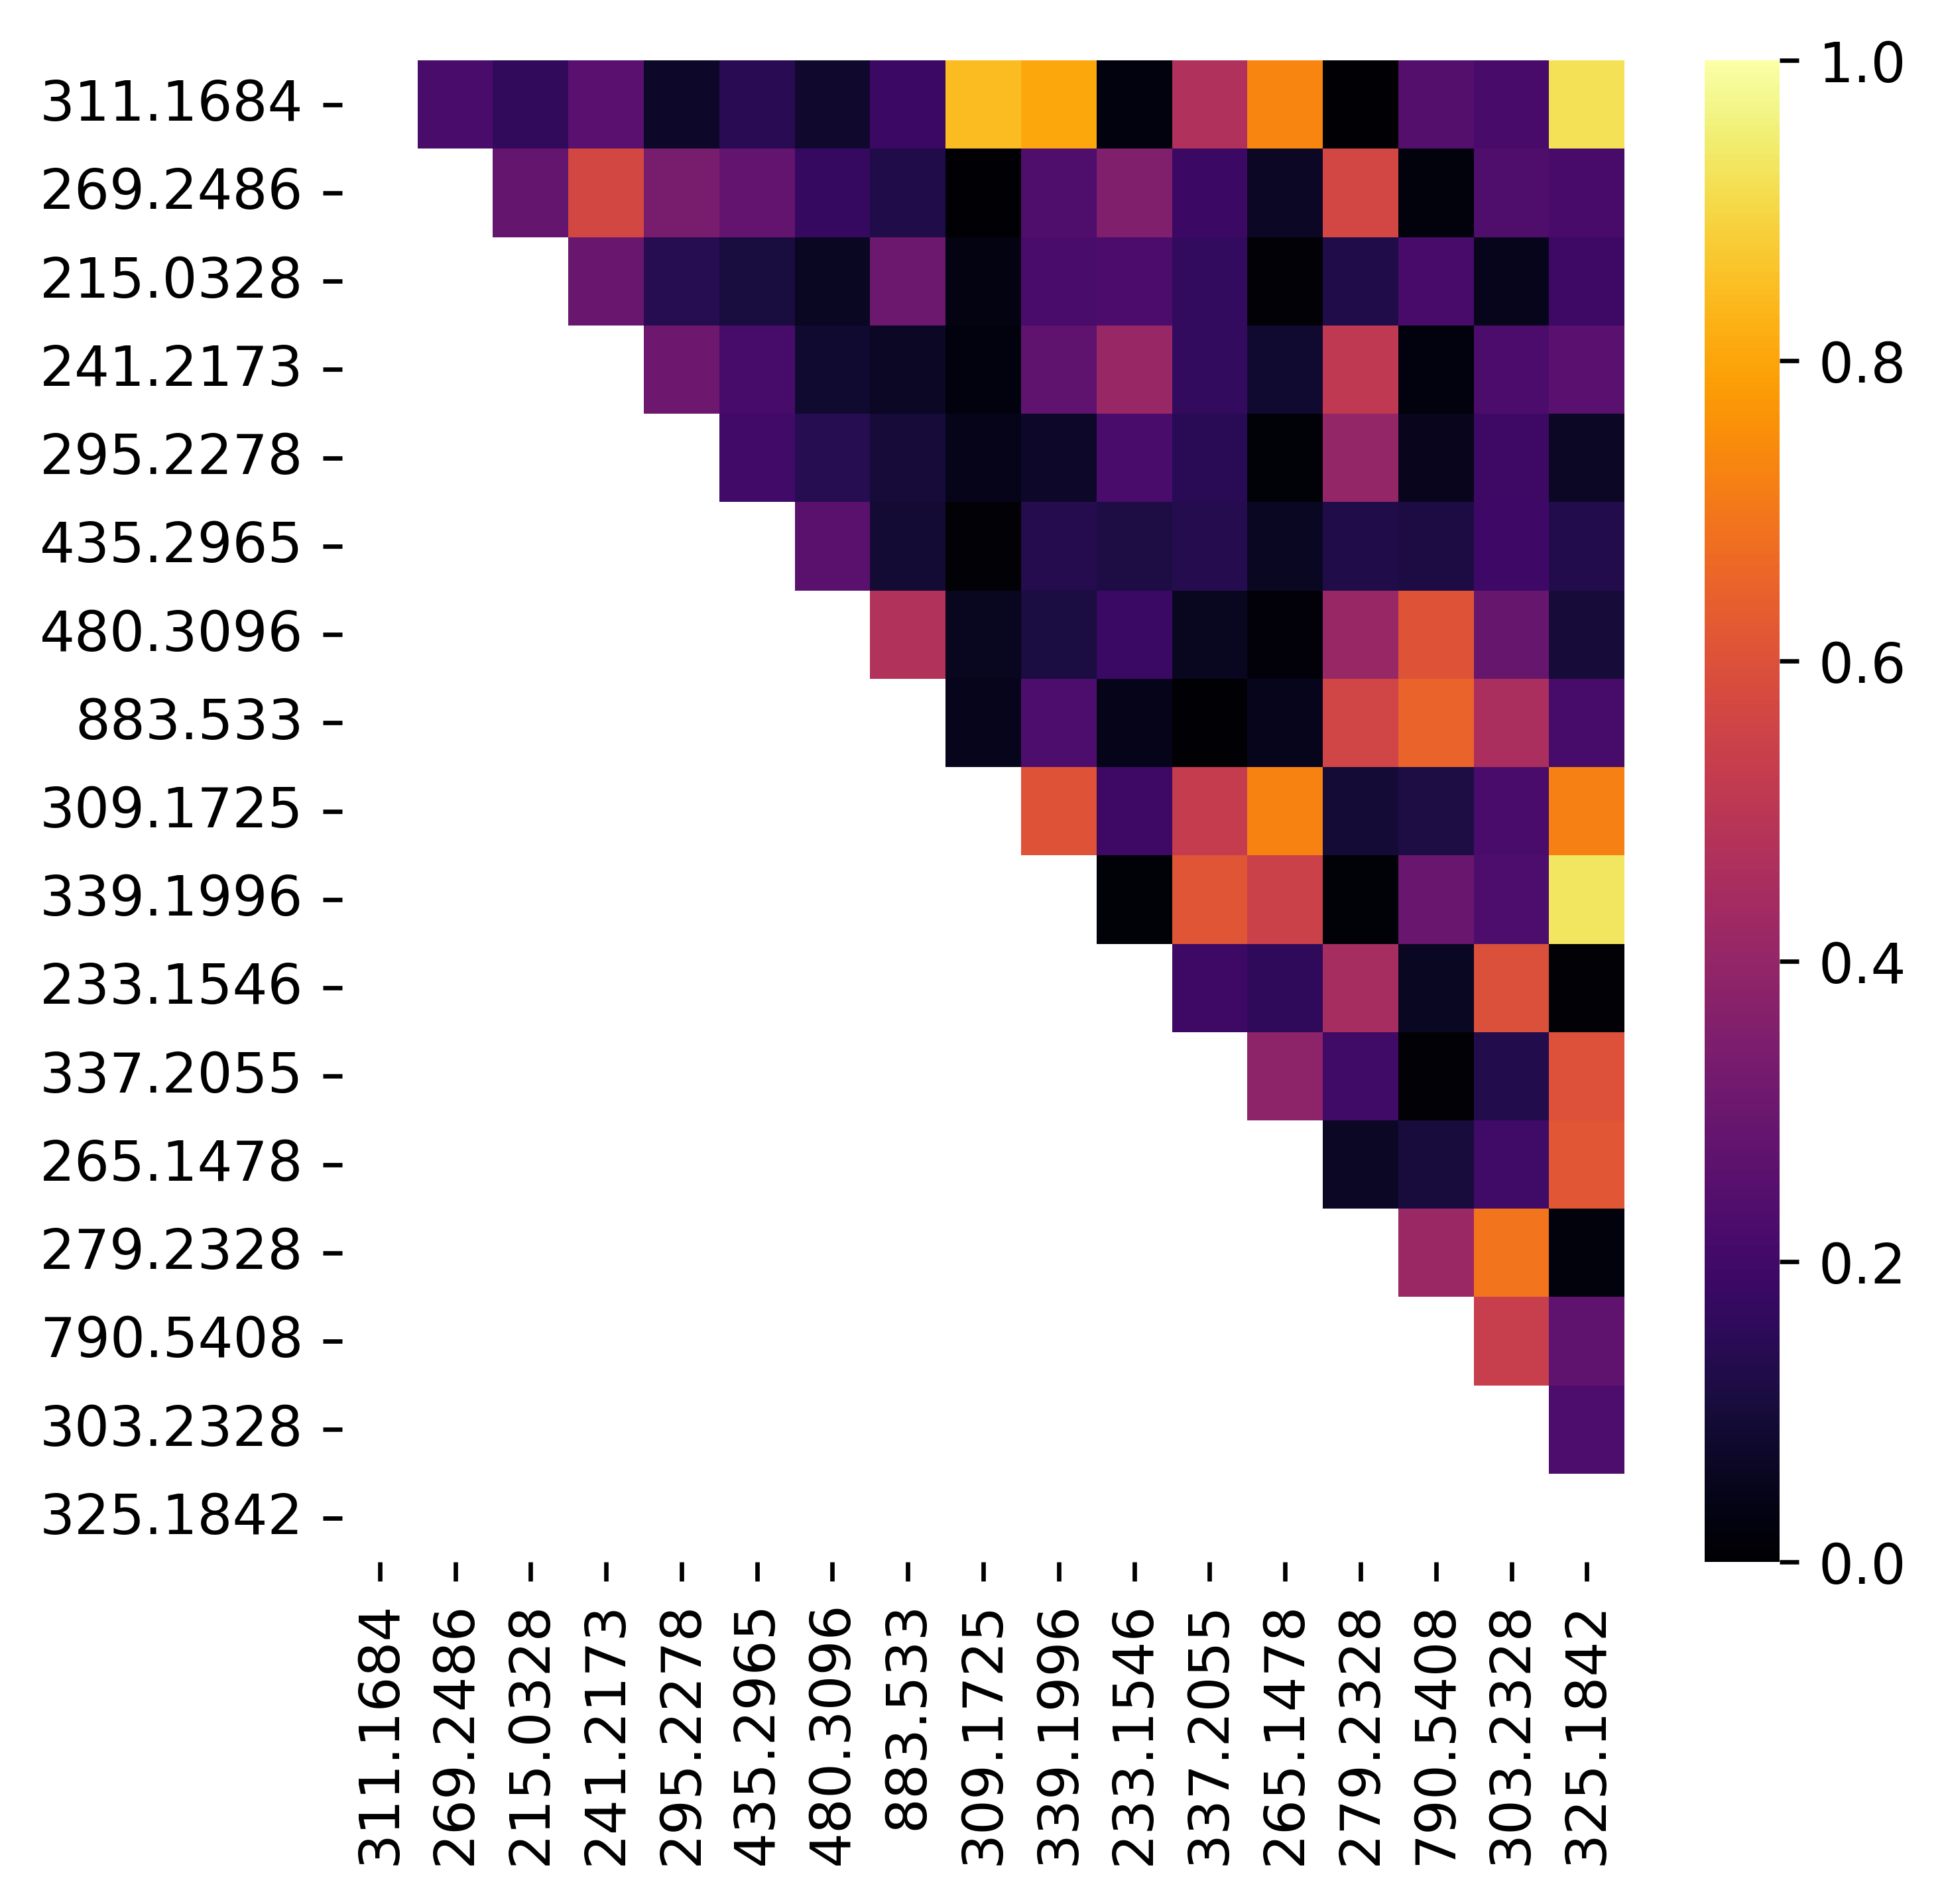

In [13]:
sns_heatmap(mz_corr(trainDEFSDf, "trainDEFSDf"))

In [14]:
mz_corr(extDEFSDf, "extDEFSDf")

,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842
311.1684,NaN,0.496882,0.178118,0.539838,0.393186,0.203395,0.368491,0.464477,0.254627,0.856188,0.438534,0.060526,0.553186,0.430941,0.386832,0.451911,0.964567
269.2486,NaN,NaN,0.018621,0.965849,0.890664,0.695395,0.799503,0.849288,0.056473,0.724418,0.758790,0.033616,0.404627,0.960489,0.743899,0.799708,0.586417
215.0328,NaN,NaN,NaN,0.017564,0.137005,0.586643,0.073129,0.085952,0.046252,0.255994,0.062366,0.014909,0.285912,0.126636,0.217983,0.264250,0.219983
241.2173,NaN,NaN,NaN,NaN,0.895533,0.682723,0.776570,0.859018,0.075173,0.743346,0.820284,0.042417,0.430386,0.921308,0.783587,0.752786,0.623741
295.2278,NaN,NaN,NaN,NaN,NaN,0.773530,0.735732,0.700850,0.023851,0.573619,0.774651,0.031936,0.280695,0.924056,0.763215,0.659191,0.461714
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,0.500835,0.647568,0.009791,0.308992,0.624433,0.036762,0.086292,0.760810,0.662492,0.695889,0.237473
480.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.650739,0.023417,0.563913,0.627556,0.007603,0.318973,0.770254,0.634282,0.557941,0.444590
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.094725,0.667645,0.753161,0.047550,0.417222,0.754334,0.668127,0.745413,0.547105
309.1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.249792,0.077104,0.275117,0.384266,0.015471,0.031421,0.053416,0.260708
339.1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.576246,0.076346,0.624173,0.635984,0.492882,0.578295,0.918709


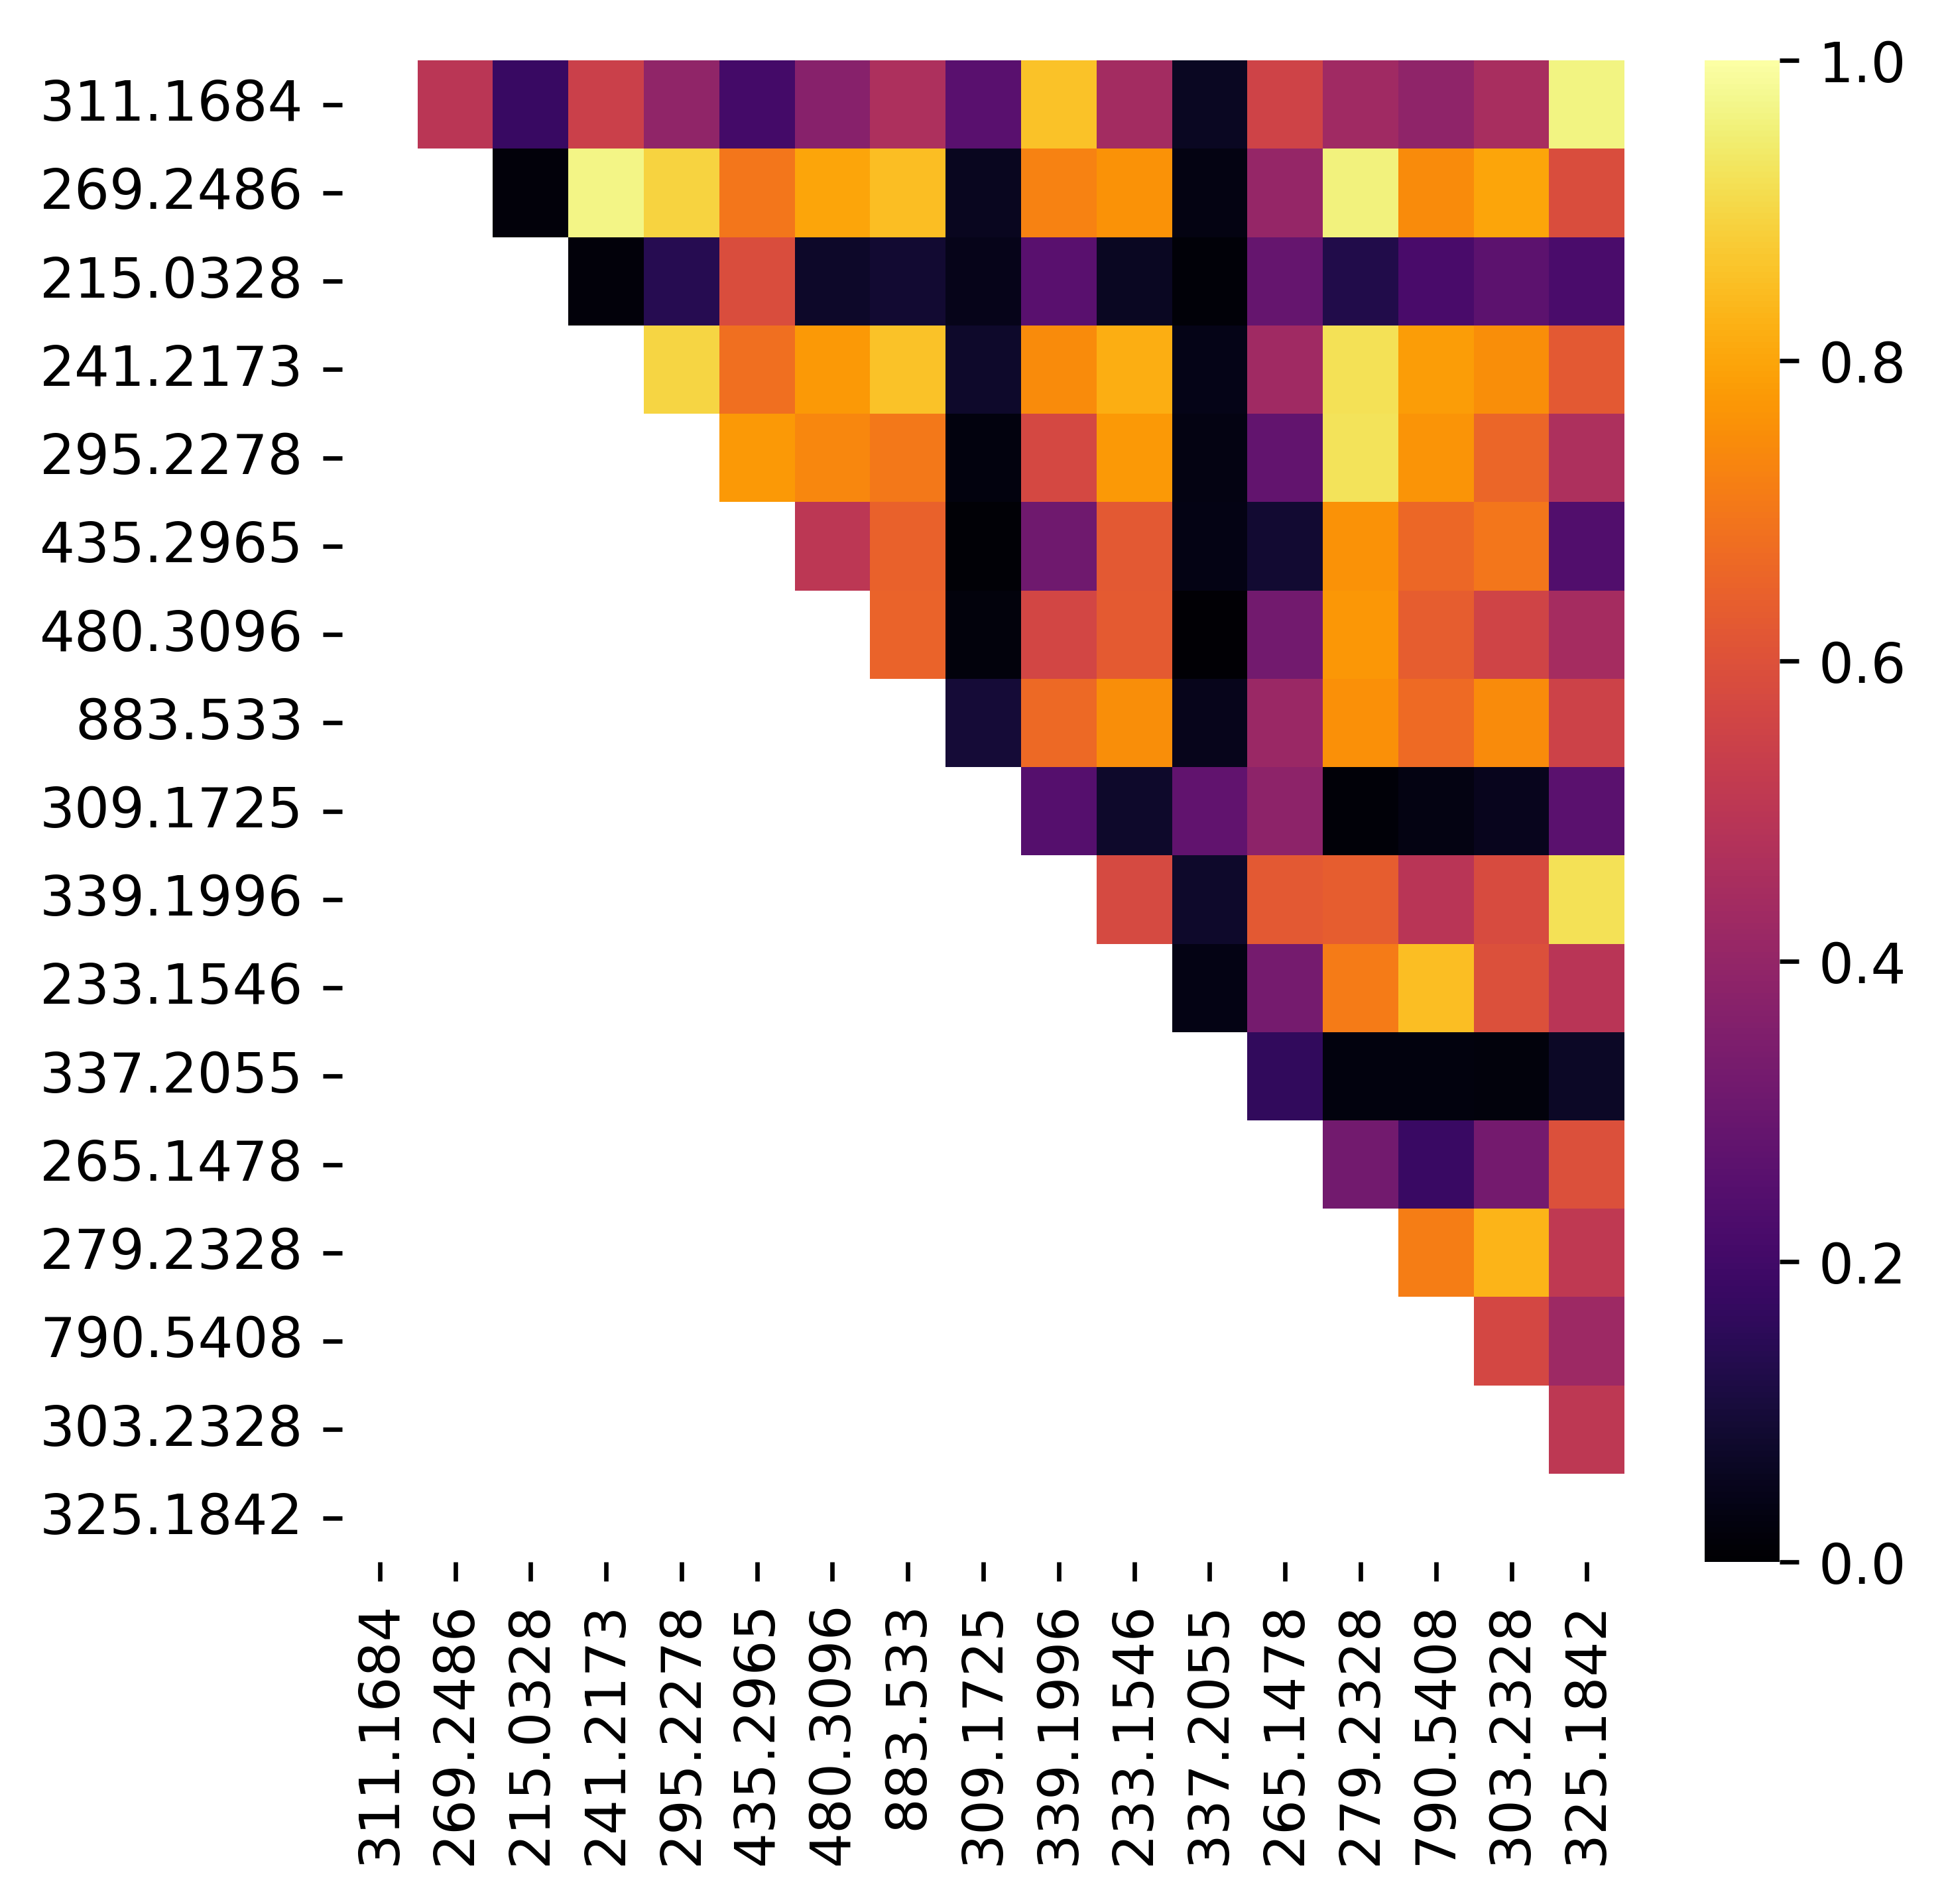

In [15]:
sns_heatmap(mz_corr(extDEFSDf, "extDEFSDf"))

In [16]:
mz_corr(fnaDEFSDf, "fnaDEFSDf")

,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842
311.1684,NaN,0.121369,0.030265,0.165518,0.055363,0.116254,0.074244,0.043243,0.250872,0.564199,0.125322,0.447882,0.686103,0.093896,0.067932,0.005784,0.696192
269.2486,NaN,NaN,0.504066,0.429861,0.629495,0.395371,0.039911,0.069352,0.336383,0.082014,0.448279,0.068405,0.126035,0.474183,0.123523,0.299372,0.108833
215.0328,NaN,NaN,NaN,0.185560,0.655658,0.625966,0.092020,0.300545,0.292379,0.004107,0.204372,0.012360,0.025292,0.712498,0.226913,0.511443,0.030398
241.2173,NaN,NaN,NaN,NaN,0.363267,0.139634,0.014890,0.011843,0.201424,0.112498,0.526674,0.093070,0.178591,0.125490,0.075132,0.143533,0.145067
295.2278,NaN,NaN,NaN,NaN,NaN,0.514459,0.052988,0.060252,0.361088,0.028139,0.403108,0.024659,0.057072,0.632681,0.170854,0.414565,0.042611
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,0.118242,0.185914,0.250959,0.048221,0.167599,0.034011,0.220341,0.665005,0.061877,0.319524,0.089302
480.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.366058,0.039917,0.036826,0.106236,0.022407,0.112875,0.349428,0.340267,0.439080,0.061056
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035027,0.016220,0.017135,0.004496,0.064964,0.433870,0.439172,0.502117,0.043208
309.1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.209225,0.241251,0.208272,0.241842,0.253662,0.032396,0.080299,0.250422
339.1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.097260,0.548162,0.454545,0.050244,0.026980,0.027978,0.610554


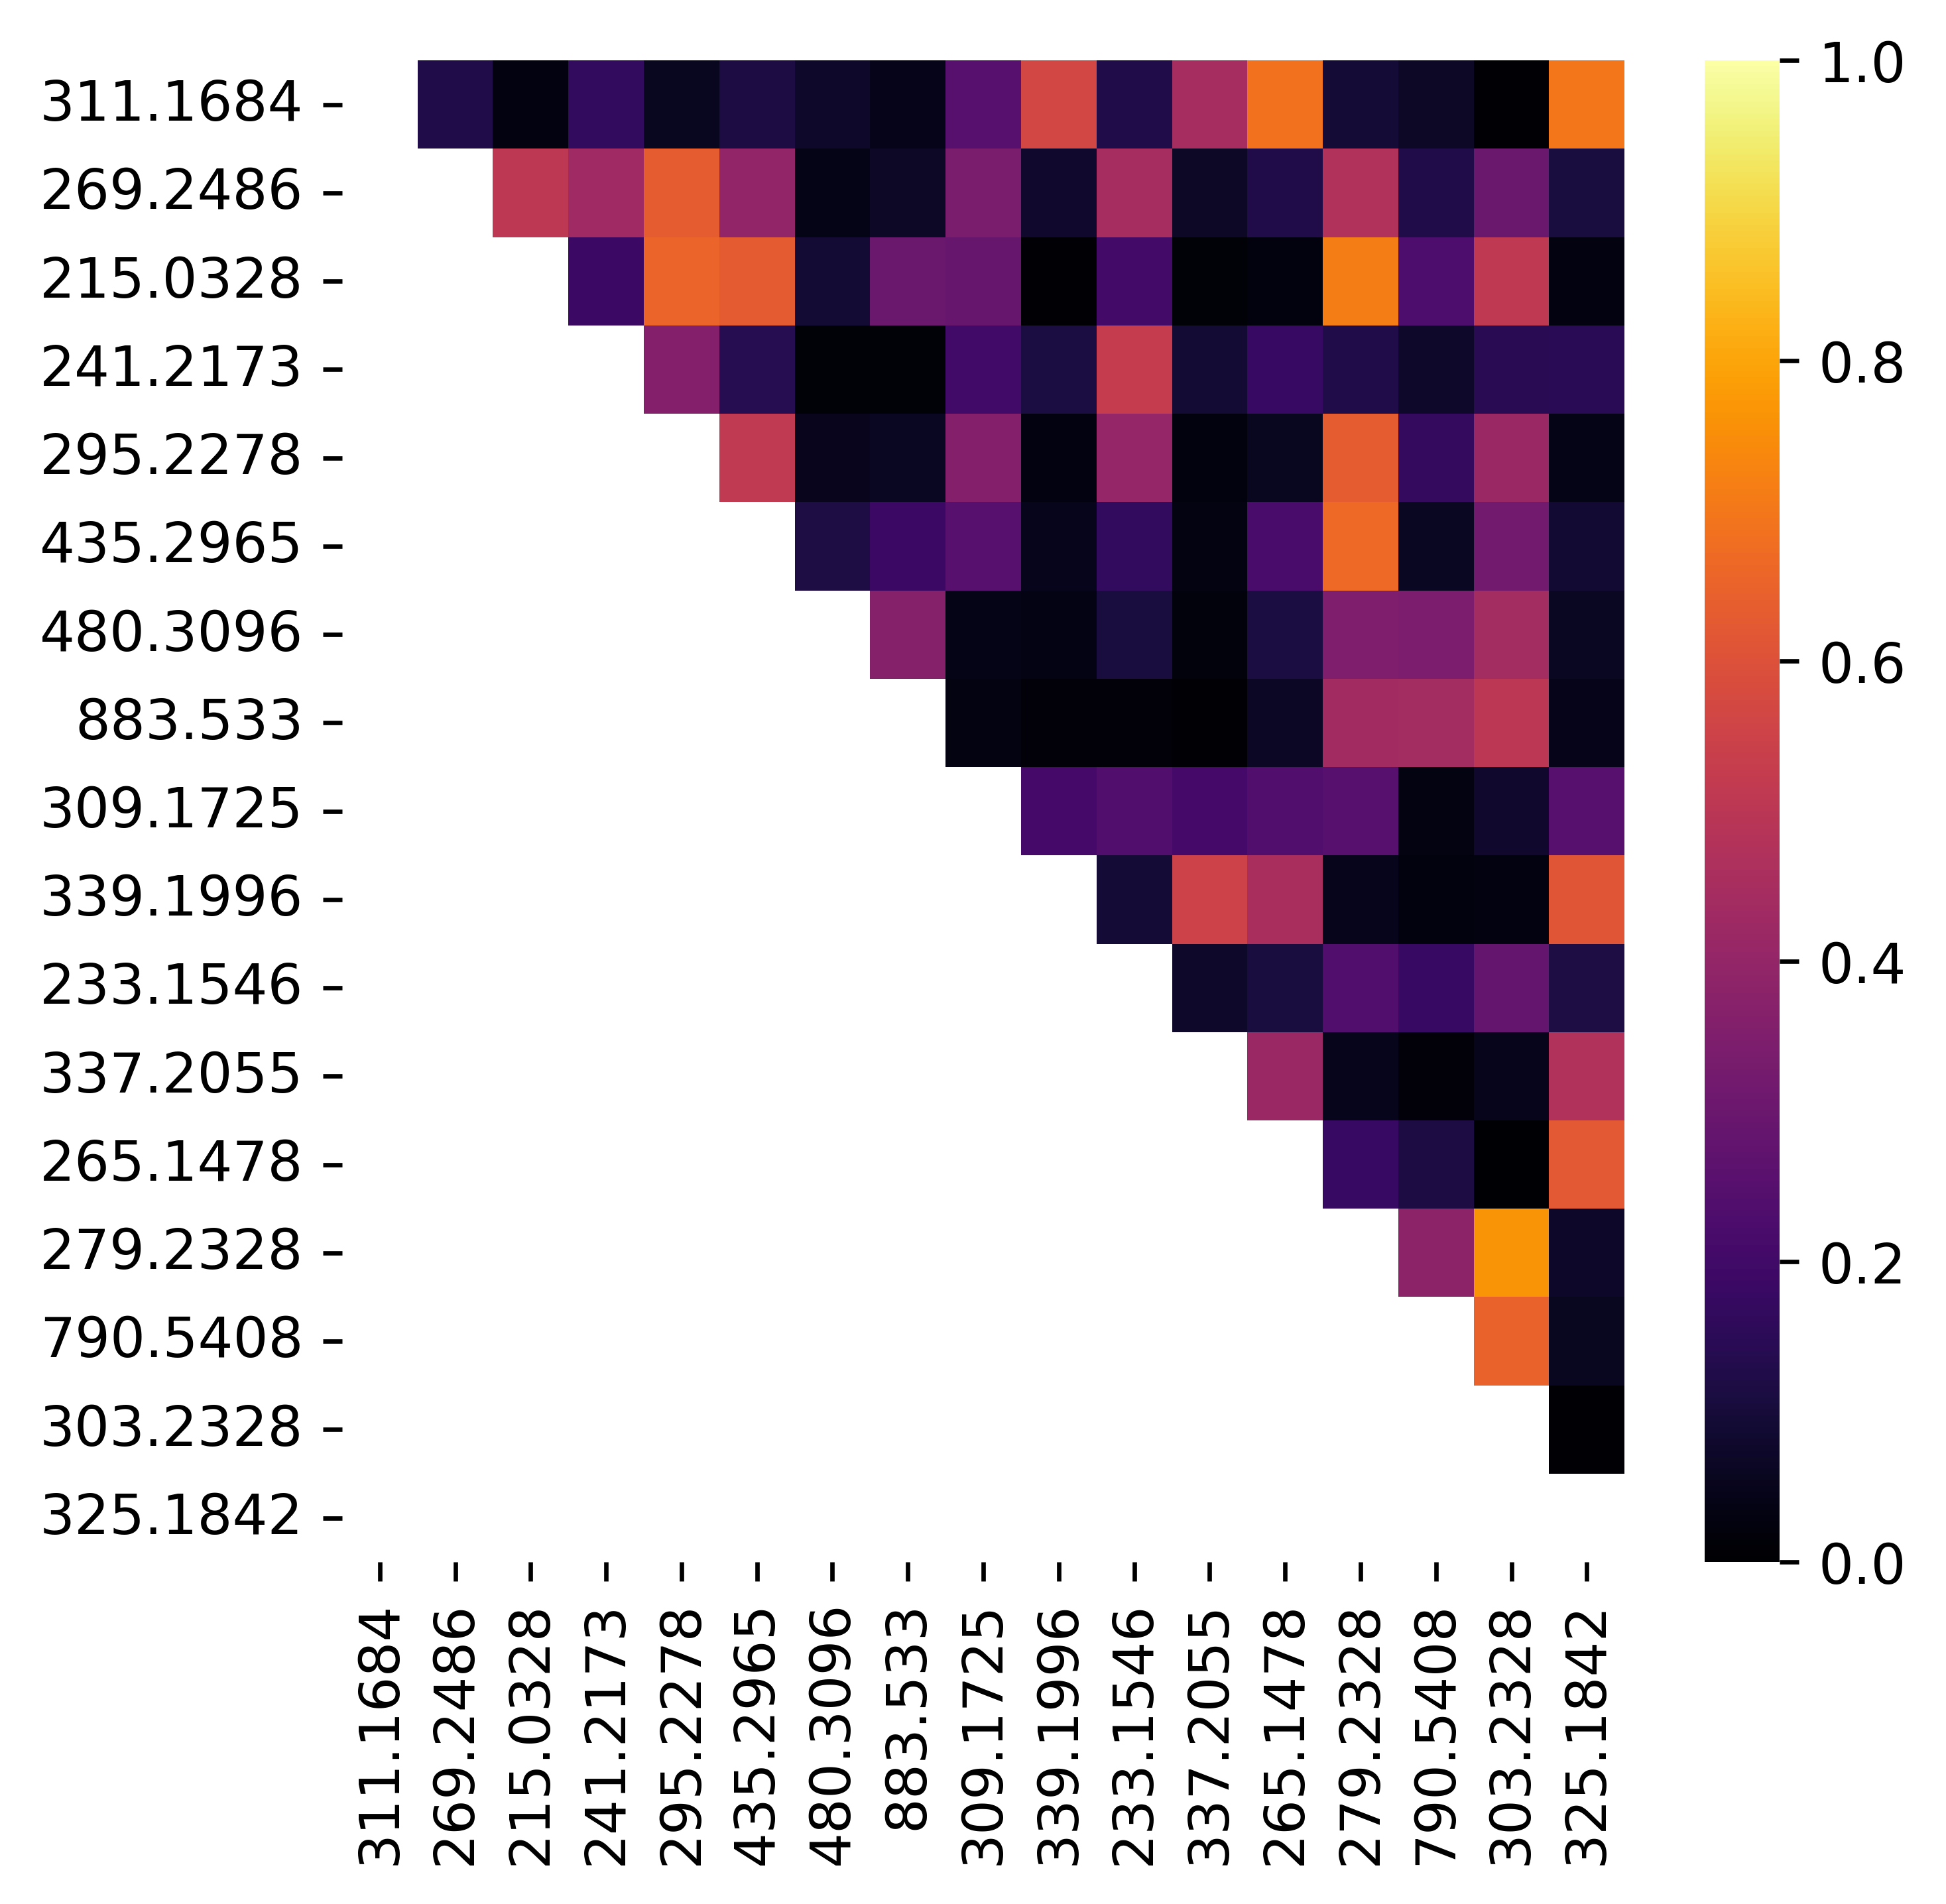

In [17]:
sns_heatmap(mz_corr(fnaDEFSDf, "fnaDEFSDf"))

In [18]:
mz_corr(ingestedDEFSDf, "ingestedDEFSDf")

,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842
311.1684,NaN,0.12316,0.096393,0.159012,0.010719,0.126453,0.083298,0.150734,0.828036,0.808157,0.034840,0.462722,0.731176,0.041350,0.245255,0.215312,0.919883
269.2486,NaN,NaN,0.027966,0.772548,0.674492,0.273382,0.079685,0.566869,0.091279,0.136675,0.556248,0.074865,0.028884,0.747577,0.099626,0.261127,0.117890
215.0328,NaN,NaN,NaN,0.011006,0.142582,0.055680,0.014694,0.306176,0.063381,0.118560,0.011454,0.133200,0.023396,0.114535,0.177574,0.092636,0.109129
241.2173,NaN,NaN,NaN,NaN,0.632323,0.215858,0.004018,0.514007,0.108757,0.180913,0.602063,0.066127,0.046885,0.670242,0.050627,0.225910,0.158266
295.2278,NaN,NaN,NaN,NaN,NaN,0.252122,0.068238,0.553071,0.055403,0.016049,0.464883,0.037954,0.022849,0.734726,0.157608,0.239329,0.003843
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,0.266481,0.046157,0.008375,0.115921,0.058954,0.128344,0.056545,0.233704,0.043593,0.081927,0.114187
480.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.264560,0.080117,0.123403,0.209917,0.070840,0.022986,0.269641,0.596296,0.304723,0.106412
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.051377,0.174946,0.323860,0.046243,0.052392,0.708901,0.496162,0.405575,0.172363
309.1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.596945,0.086473,0.529970,0.713621,0.001286,0.114529,0.205530,0.708999
339.1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.009181,0.607587,0.546013,0.052248,0.296007,0.236522,0.932749


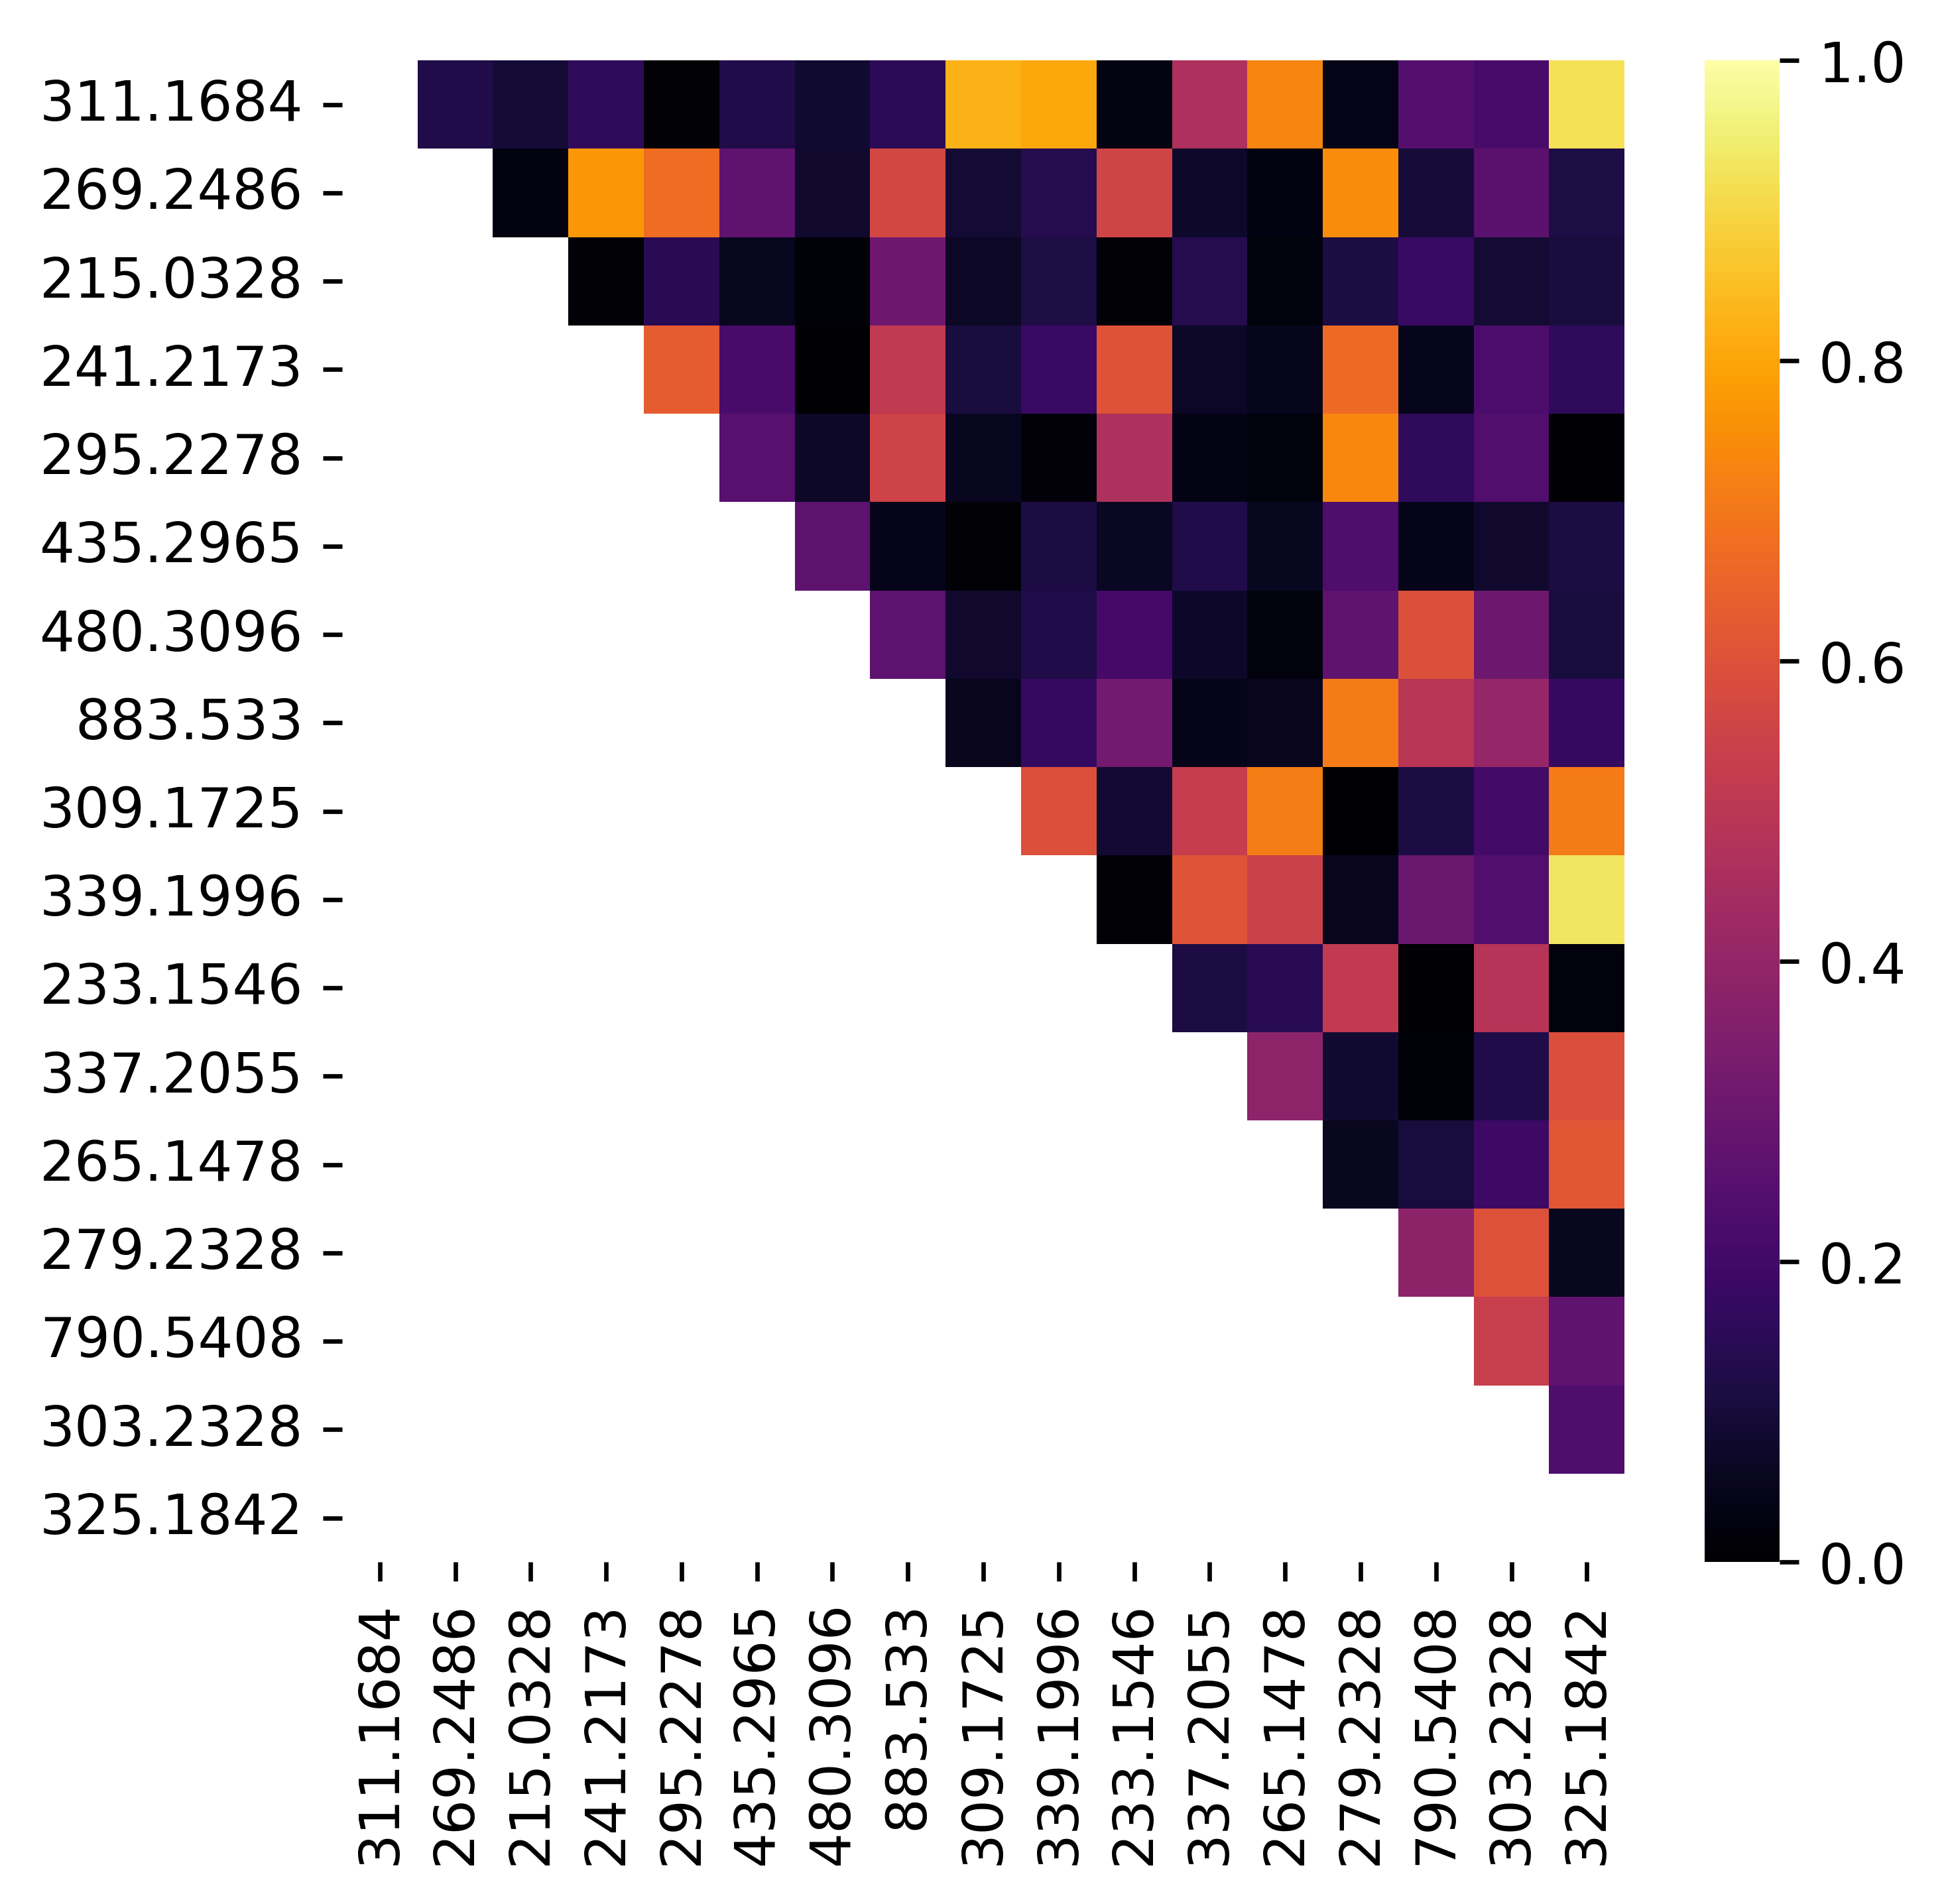

In [19]:
sns_heatmap(mz_corr(ingestedDEFSDf, "ingestedDEFSDf"))

In [20]:
mz_corr(diDEFSDf, "diDEFSDf")

,311.1684,269.2486,215.0328,241.2173,295.2278,435.2965,480.3096,883.533,309.1725,339.1996,233.1546,337.2055,265.1478,279.2328,790.5408,303.2328,325.1842
311.1684,NaN,0.406679,0.035521,0.390110,0.172548,0.424452,0.123133,0.256959,0.441903,0.915732,0.229401,0.478527,0.429604,0.360440,0.062573,0.231549,0.978378
269.2486,NaN,NaN,0.161617,0.829359,0.520350,0.442252,0.250783,0.221169,0.623420,0.600354,0.704087,0.695820,0.568008,0.524469,0.281892,0.419921,0.512519
215.0328,NaN,NaN,NaN,0.112253,0.148373,0.185524,0.339740,0.181861,0.051043,0.056656,0.157843,0.005371,0.079620,0.059883,0.183525,0.089123,0.046988
241.2173,NaN,NaN,NaN,NaN,0.445694,0.525249,0.139675,0.216937,0.616567,0.575937,0.726063,0.696578,0.579716,0.471949,0.244868,0.425614,0.492196
295.2278,NaN,NaN,NaN,NaN,NaN,0.265488,0.324900,0.025646,0.352974,0.326193,0.127772,0.339548,0.413765,0.703079,0.070460,0.648689,0.246646
435.2965,NaN,NaN,NaN,NaN,NaN,NaN,0.162145,0.240797,0.333187,0.453010,0.303852,0.385448,0.350586,0.267576,0.053699,0.161890,0.443347
480.3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.171653,0.205975,0.307562,0.234923,0.260394,0.141572,0.309747,0.485266,0.312680,0.213345
883.533,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.378359,0.359363,0.267292,0.412045,0.329451,0.182301,0.543551,0.076314,0.307299
309.1725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.667198,0.606196,0.918543,0.966452,0.537441,0.366846,0.406979,0.563840
339.1996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.453445,0.721660,0.631454,0.531706,0.237740,0.404491,0.974457


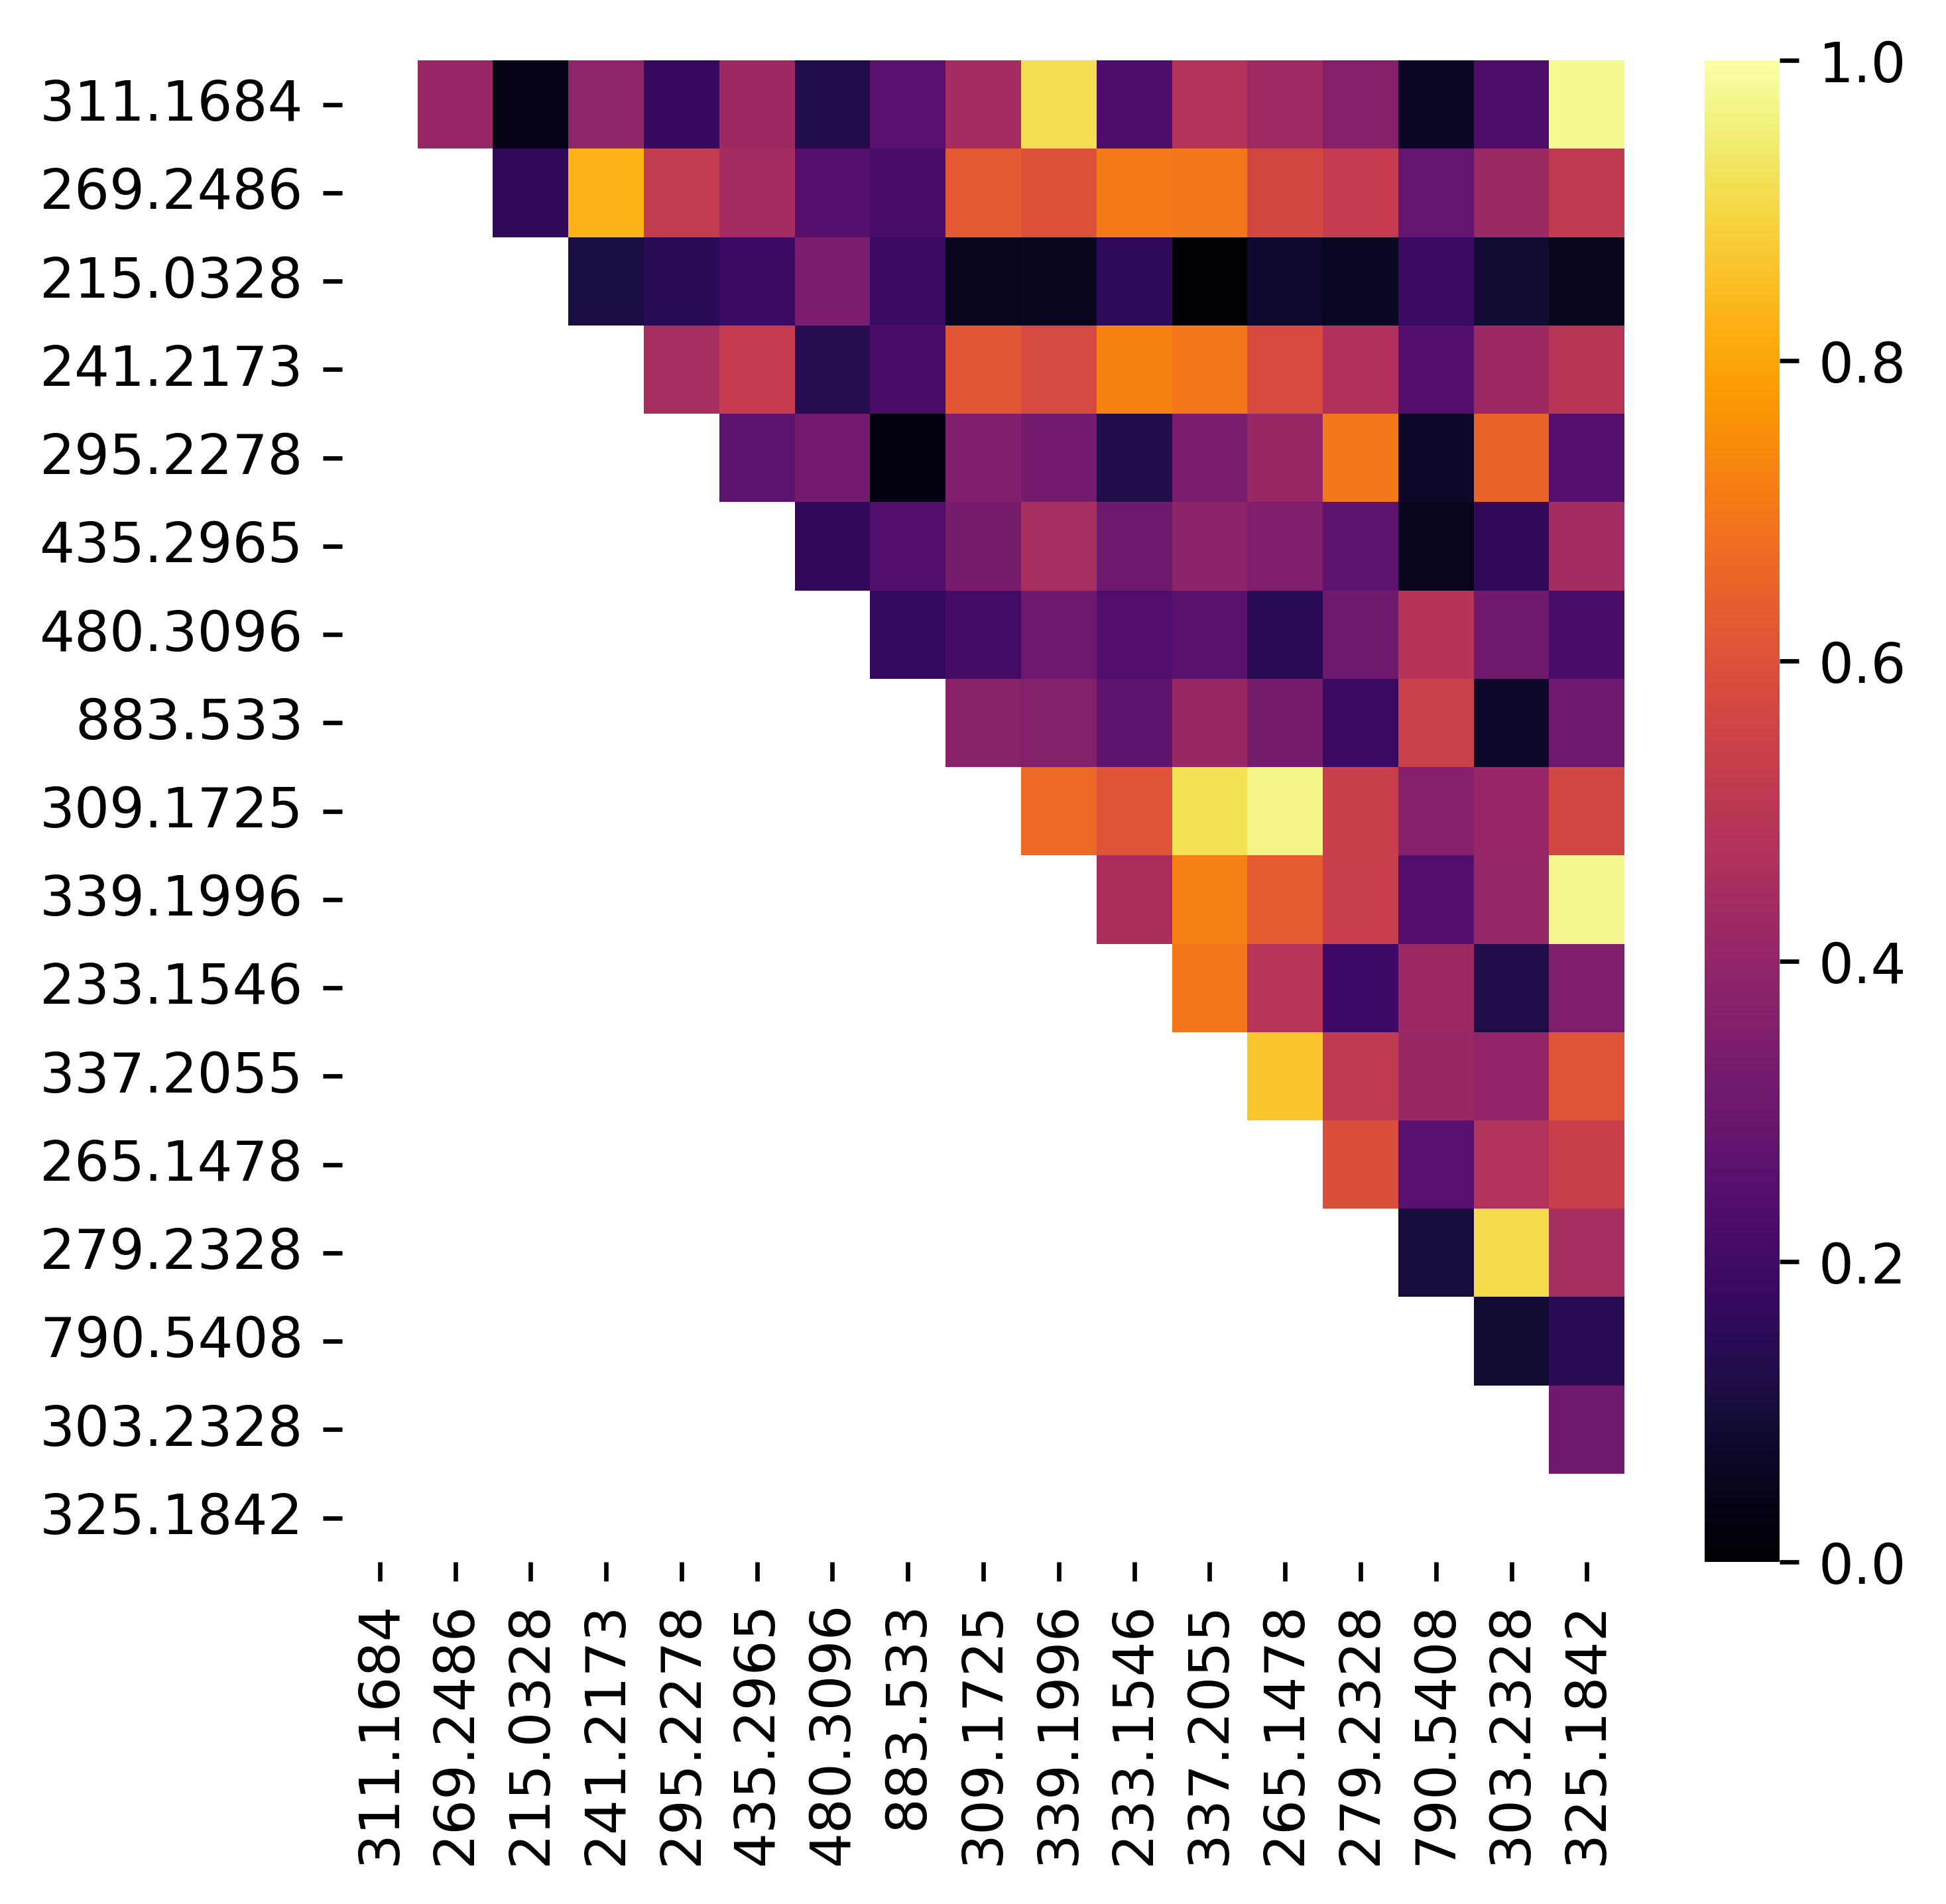

In [21]:
sns_heatmap(mz_corr(diDEFSDf, "diDEFSDf"))